##**Theoritical & Practical Concepts of Decision-Tree Algorithm**

---

## Understanding Decision Trees: A Comprehensive Guide

Decision trees, a fundamental tool in the realm of machine learning, employ a tree-like structure to solve a wide array of problems. These versatile algorithms belong to the realm of supervised learning, offering applications in both classification and regression. They are often referred to as Classification and Regression Trees (CART).

### The Basics: What Is a Decision Tree?

Imagine a flowchart-like tree structure, where each node represents a decision made based on a set of conditions. The process follows a series of "if-then-else" statements to arrive at a final decision. Let's break down the fundamental components of a decision tree:

1. **Root Node**: The initial node, devoid of incoming branches.
   
2. **Internal Nodes**: Decision nodes that dictate the splitting of data based on specific criteria.

3. **Branches**: Arrows connecting nodes, illustrating the decision-making steps.

4. **Leaf Nodes**: These represent the possible outcomes derived from the input dataset.

The decision tree begins with a single node and iteratively splits the data into possible outcomes, forming a branching structure.

### Splits and Impurity: A Crucial Concept

In the journey of constructing a decision tree, we encounter two essential concepts: pure split and impure split. Let's explore them in simple terms:

- **Pure Split**: This occurs when there's only one condition in a split. At this point, we stop further splitting as we've reached a definitive decision.

- **Impure Split**: When there are two or more conditions in a split, it's considered impure. In such cases, we continue splitting until we reach a pure split, achieving a clear decision.

### Evaluating Purity and Selecting Features

Now, the question arises: how do we determine if a split is pure or impure, and how do we choose the features for splitting?

1. **Evaluating Purity**: We assess the purity of a split using metrics like **Entropy** and the **Gini coefficient**. These metrics help us measure the randomness or impurity within a set of data.

2. **Feature Selection**: To decide which features to use for splitting, we employ a metric called **information gain**. It quantifies the reduction in entropy or impurity that a particular feature brings when used for splitting.

Incorporating these concepts, we craft decision trees that effectively guide us through complex decision-making processes in machine learning.

**Avoiding Overfitting**

Overfitting is a practical challenge when building a Decision-Tree model. It arises when the algorithm delves excessively into the training set, resulting in reduced accuracy on the test set. Typically, this happens due to the model creating many branches to account for outliers and irregularities in the data.

Two approaches can help mitigate overfitting:

**Pre-Pruning**

In pre-pruning, we halt the tree construction before it goes too deep. We avoid splitting a node if its goodness measure falls below a certain threshold. However, determining the appropriate stopping point can be challenging. Pre-Pruning can also be termed "early stopping." Use **maximum depth**

**Post-Pruning**

Post-pruning involves constructing a complete tree and addressing overfitting afterward. If the tree exhibits signs of overfitting, we use pruning as a corrective step. We utilize cross-validation data to assess the impact of pruning. If expanding a node enhances accuracy, we continue the expansion. Conversely, if it decreases accuracy, we convert the node into a leaf node.

# Applying Decision Tree Classifier Machine Learning

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?ref=machinelearningnuggets.com

Context:

The dataset is collected from Kaggel. The dataset is about the quality of Red wine. The dataset has 12 features from which we will build a decision tree model and a random forest to decide whether a particular wine is good(1) or not (0) as per quality where  > 6 = "good" and < 6 ="bad".


In [ ]:
df= pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Explotarory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Summary of variables**

- There is no missing values.
- All the data are in numerical data type.

**Explore quality variable**

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The quality of the red wine varies 3 to 8. we make into two groups where >=6 is good quality and <6 is bad quality.

In [ ]:
# 2-6 = bad, 6-8=good
bins = (2, 6, 8)
groups = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = groups)

In [ ]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Split

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

Train Test split

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1119, 11), (480, 11))

# Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.
- imputation for missing value
- encoding for catagorical data
- scaling for setting data into a similar scale for model building

# Feature Scaling
Feature scaling is the process of setting the variables on a similar scale. This is usually done using normalization, standardization.

**Standardization**

Standardization is the process of centering the variable at 0 (zero mean) and standardizing the variance to 1 (unit variance), and it is suitable for variables with a Gaussian distribution.

In [ ]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.169536,-1.721071,0.459303,-0.454282,-0.503192,3.610972,0.909502,-0.401203,1.011807,1.226612,0.550057
1,2.446067,-0.401957,1.841055,-0.384209,-0.354641,-0.966099,-0.968038,1.099235,-2.106876,1.226612,-0.205175
2,-0.647680,0.037747,-0.001281,0.036226,-0.078761,-0.381792,0.939785,-0.205494,0.492026,0.297271,0.550057
3,-1.114661,0.752267,-0.973624,-0.314137,-0.906402,0.299899,0.031298,-1.020949,1.141752,-0.980573,0.927673
4,-0.472562,0.257600,-0.666568,-0.244064,-0.227312,1.078975,0.394693,-0.259857,-0.222672,-0.399735,-0.582790


# Building a Decision Tree model with sklearn

The steps are:
- Import the DecisionTreeClassifier class.
- Instantiate the classifier model.
- Fit the model.
- Predict.
- Evaluate model performance.




We will consider some of the following parameters:

- criterion - measures the quality of a split. The criteria supported are Gini and entropy for information gain.

- splitter - strategy for choosing a split at each node. Supports 'best' and 'random' strategies.

- max_depth - maximum depth of the tree. The deeper the tree, the more complex the decision rules, and the fitter the model.

- random_state - controls the randomness of splitting.

- min_samples_split- The minimum number of samples required to split an internal node.

- min_samples_leaf - The minimum number of samples required to be at a leaf node.

- max_leaf_nodes - Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None, then an unlimited number of leaf nodes.

# Decision Tree Classifier

**Instantiate the model**

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf = DecisionTreeClassifier(random_state=42)

**Fit The Model**

In [ ]:
# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Predict The Model**

In [ ]:
y_pred = clf.predict(X_test)

**result**

At this point, the model is trained and ready to predict the output of new observations.

In [ ]:
# y_test and y_pred are your actual and predicted labels
prediction_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Prediction Correct': y_test == y_pred # True if prediction is correct, False otherwise
})

# Display the prediction_df DataFrame
print(prediction_df)

     Actual Value Predicted Value  Prediction Correct
803           bad             bad                True
124           bad             bad                True
350           bad             bad                True
682           bad             bad                True
1326          bad             bad                True
...           ...             ...                 ...
1468         good            good                True
495          good            good                True
1325          bad             bad                True
514          good            good                True
576           bad             bad                True

[480 rows x 3 columns]


**Evaluate the Model**

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8604


**Compare model accuracy with Null/Baseline accuracy**

Null or Baseline accuracy

Comapring model accuracy with a null or baseline accuracy is a good practice to evaluate the model's performance. The null accuracy is the accuracy achieved by a model that always predicts the most frequent class in the dataset. It provides a baseline for comparison, helping to gauge whether the model's performance is meaningful and better than a simple baseline prediction strategy.

I will do so, & compare

In [ ]:
y_test.value_counts()

bad     413
good     67
Name: quality, dtype: int64

In [ ]:
baseline_accuracy = (273/(273+47))
print('Baseline/Null accuracy: {0:0.4f}'. format(baseline_accuracy))

Baseline/Null accuracy: 0.8531


We can see that our model accuracy score is 0.8594 but null or baseline accuracy score is 0.8531.

So, we can conclude that our Decision Tree Classifier with criterion gini is doing a very good job in predicting the class labels.

**Check for overfitting and underfitting:**

Overfitting usually manifests as a significant gap between training and test accuracies.

Underfitting is marked by low accuracies on both sets due to insufficient model complexity.

Generalized Model is demonstrates consistent performance on both training and test sets, suggesting it is well-generalized and not overfit.

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8604


The training score is higher than the test score, it suggests that the model is performing exceptionally well on the data it was trained on but not as well on unseen data (the test set). This situation commonly occurs due to overfitting

To further assess the model's performance, we can also look at other evaluation metrics like precision, recall, and F1-score, and visualize the model's performance using a confusion matrix.

Additionally, cross-validation can be a helpful technique to assess the model's stability and performance across different subsets of the data.



# Evaluation metrics

**Confusion Matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[371  42]
 [ 25  42]]

True Positives(TP) =  371

True Negatives(TN) =  42

False Positives(FP) =  42

False Negatives(FN) =  25


Interpret

The confusion matrix shows (TP+TN) 371 + 42 = 413 correct predictions

and (FP+FN) 42 + 25 = 67 incorrect predictions.

array([[371,  42],
       [ 25,  42]])

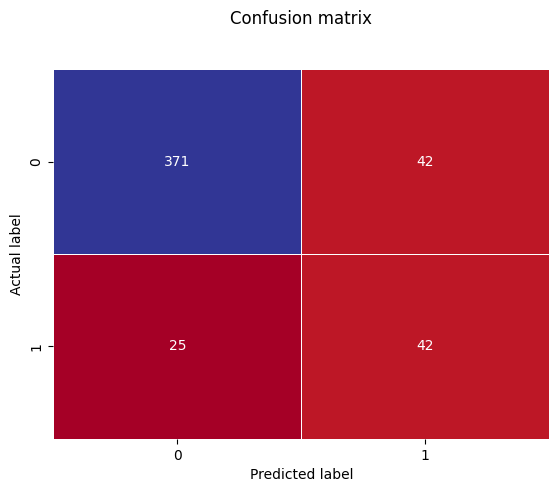

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='RdYlBu', linewidth=.5, fmt='g', cbar=False)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cm

**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Bad Quality', 'Good Quality']
pd.DataFrame(classification_report(y_test, y_pred,target_names=target_names, output_dict=True))

,Bad Quality,Good Quality,accuracy,macro avg,weighted avg
precision,0.936869,0.500000,0.860417,0.718434,0.875889
recall,0.898305,0.626866,0.860417,0.762585,0.860417
f1-score,0.917182,0.556291,0.860417,0.736737,0.866807
support,413.000000,67.000000,0.860417,480.000000,480.000000


Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

**precision = TP / float(TP + FP)**

Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

recall = TP / float(TP + FN)

f1-score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0.

f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

Support

Support is the actual number of occurrences of the class in our dataset.

**Visualize the Decision tree**

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)



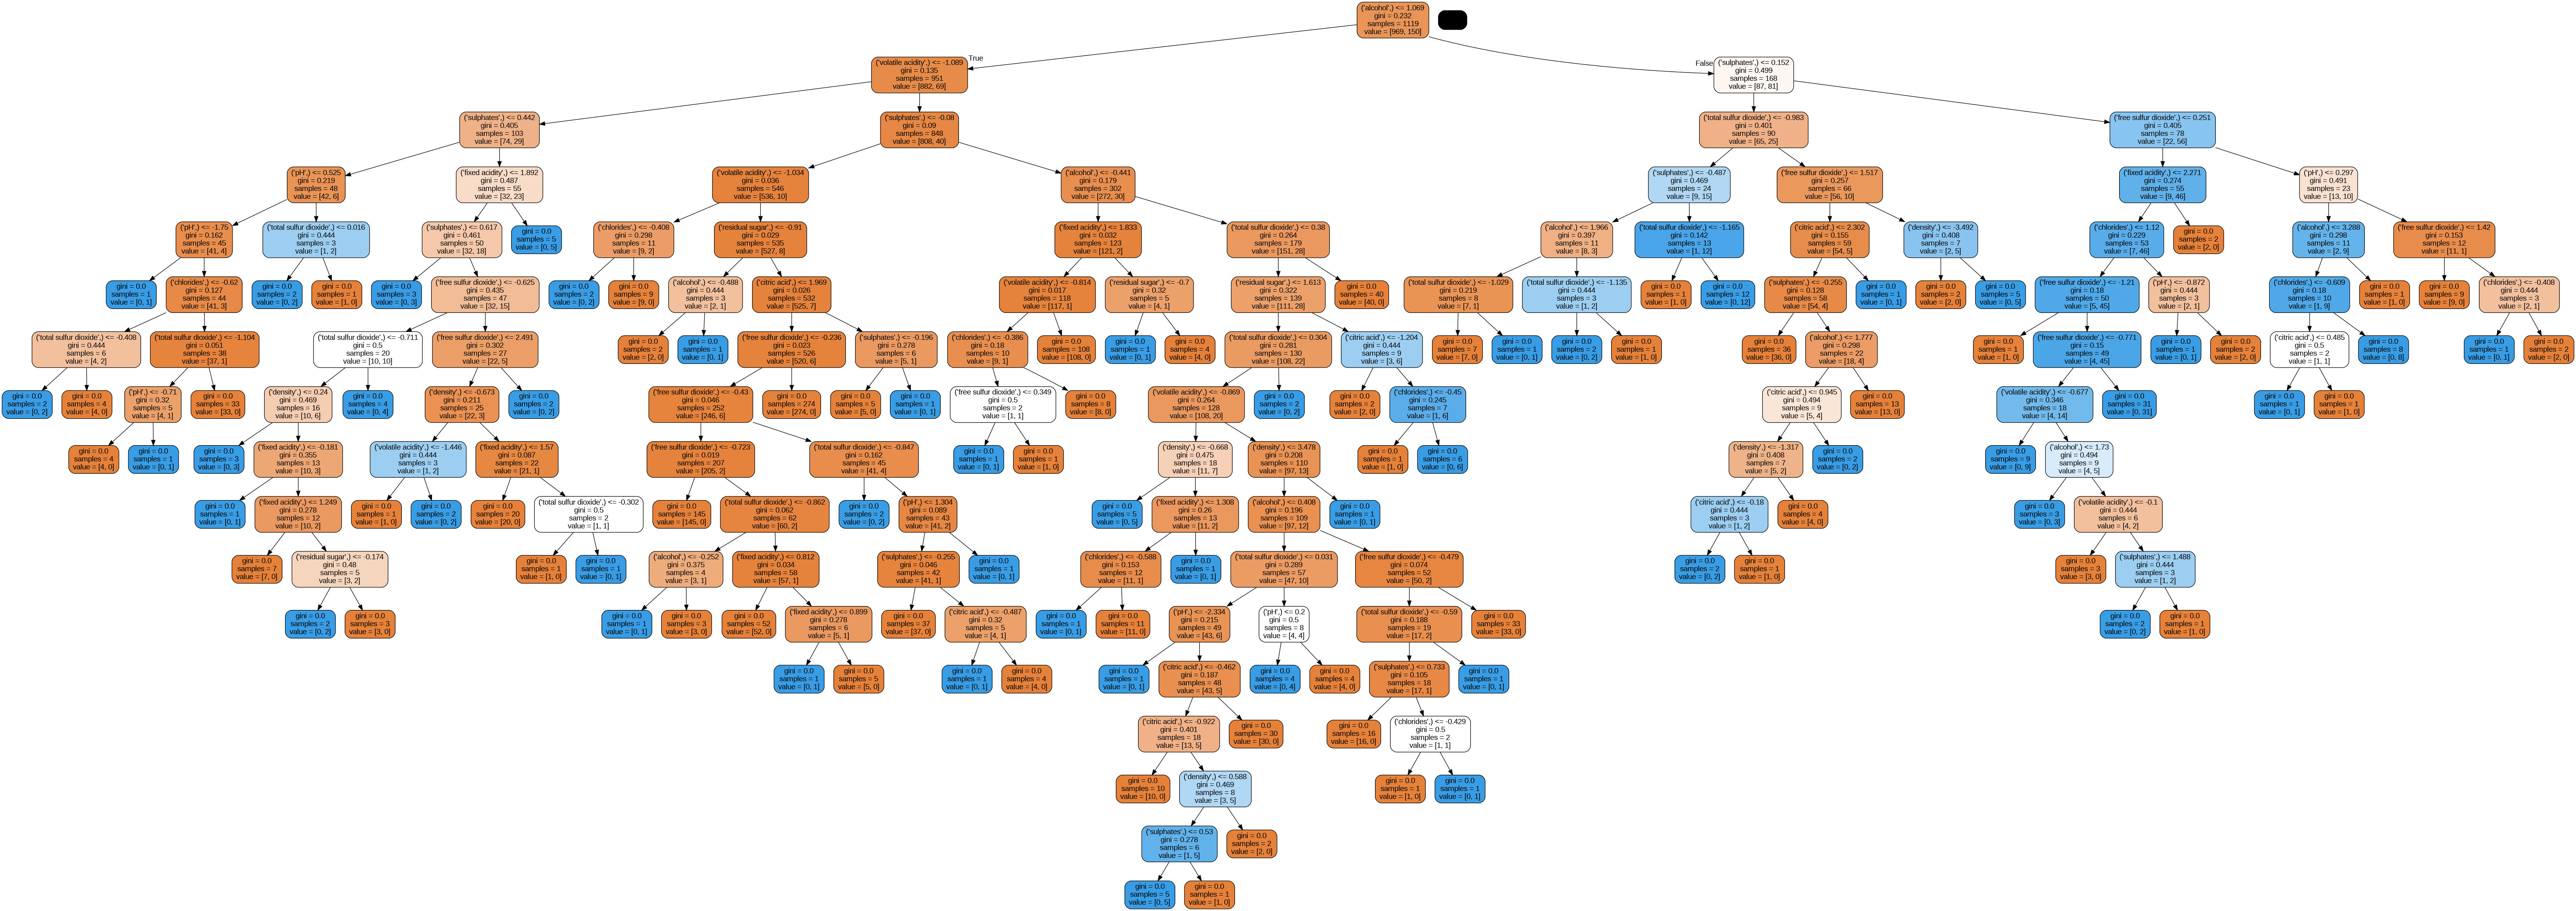

In [ ]:
from PIL import Image

Decision_tree = Image.open('/content/original_tree.png')
Decision_tree

observation:

There is too many rules, the model is a hard to interpret

# Hyperparameter tuning

**What is Hyperparameter Tuning?**
In machine learning, a model's hyperparameters are settings that guide the learning process but are not learned from the data itself. Hyperparameter tuning involves finding the best combination of these settings to optimize a model's performance.

**Why Hyperparameter Tuning?**
Hyperparameters significantly affect a model's behavior and performance. The right choice of hyperparameters can lead to a model that generalizes well to unseen data and achieves better accuracy. Conversely, poor choices can result in overfitting (model learns too much from the training data and performs poorly on unseen data) or underfitting (model fails to capture the underlying patterns in the data).

**Why Hyperparameter Tuning in Decision Tree?**
Decision Trees, while powerful, are prone to overfitting if not appropriately tuned. Hyperparameters in a Decision Tree, such as the maximum depth of the tree, the minimum samples required to split a node, and the criterion for splitting, profoundly influence the tree's structure and predictive ability.

By tuning these hyperparameters, we can ensure that the Decision Tree generalizes well to unseen data, capturing the essential patterns without being overly complex.

**Perform Hyperparameter Tuning for Decision tree classifier**

- Criterion for splitting (criterion), such as 'gini' or 'entropy'.
- splitter - strategy for choosing a split at each node. Supports 'best' and 'random' strategies.
- Maximum depth of the tree (max_depth).
- Minimum samples required to split an internal node (min_samples_split).
- Minimum samples required at a leaf node (min_samples_leaf).


**defining Hyperparameter Tuning parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameters
param_grid = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 15))),
    "min_samples_split":[2, 3, 4, 6, 8],
    "min_samples_leaf":list(range(1, 15)),
}

**define the model with grid search cv**

In [ ]:
# training model on the define params with GridSearchCV
clf_tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(clf_tree, param_grid,scoring="accuracy",
                       n_jobs=-1, verbose=1, cv=3)

**fit the model**

In [ ]:
tree_cv.fit(X_train, y_train)

Fitting 3 folds for each of 3920 candidates, totalling 11760 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

**predict the model**

In [ ]:
predictions = tree_cv.predict(X_test)

**best patameters**

In [ ]:
optimal_params = tree_cv.best_params_
optimal_params

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'splitter': 'best'}

**grid Search evaluation/perfomance score**

In [ ]:
print('Best model score: ', tree_cv.best_score_)

Best model score:  0.8927613941018767


In [ ]:
print("\nCLASSIFICATION REPORT")
target_names = ['Bad Quality', 'Good Quality']
pd.DataFrame(classification_report(y_test,
                                   predictions,
                                   target_names=target_names,
                                   output_dict=True))


CLASSIFICATION REPORT


,Bad Quality,Good Quality,accuracy,macro avg,weighted avg
precision,0.901149,0.533333,0.866667,0.717241,0.849808
recall,0.949153,0.358209,0.866667,0.653681,0.866667
f1-score,0.924528,0.428571,0.866667,0.676550,0.855301
support,413.000000,67.000000,0.866667,480.000000,480.000000


Pruning Decision Trees

In most cases, decision trees are prone to overfitting. A decision tree will overfit when allowed to split on nodes until all leaves are pure or until all leaves contain less than min_samples_split samples. That is, allowing it to go to its max-depth.

Allowing a decision tree to go to its maximum depth results in a complex tree, as in our example above.

Pruning can be classified into:

Pre-pruning
Post-pruning


**Pre-pruning**

Pre-pruning can also be termed "early stopping." Here we try to stop the tree from splitting to its maximum depth.

Remember:

The decision tree we have created above is complex and not easily explainable.
We performed hyperparameter tuning, where we got the optimal parameter values.
To simplify the model, we can retrain it with the values from hyperparameter tuning, get its accuracy and visualize the tree again.

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini',
                             max_depth=4,
                             splitter='best',
                             min_samples_leaf=8,
                             min_samples_split=2,
                             random_state=42
                            )

classifier = classifier.fit(X_train, y_train)
print('Testing Set Evaluation Accuracy: ',
      accuracy_score(y_test,classifier.predict(X_test)))

Testing Set Evaluation Accuracy:  0.8666666666666667


our model accuracy has a slight improvement than the original model accuracy

**Visulaize**

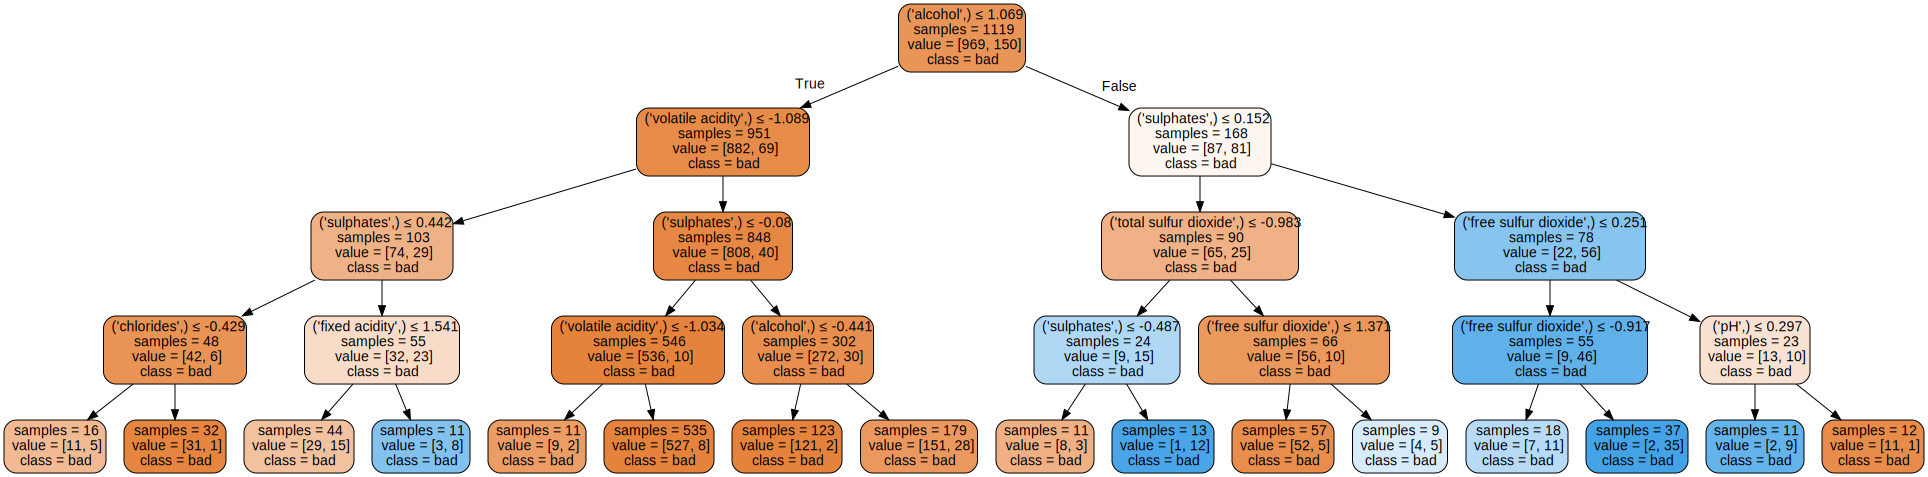

In [ ]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              impurity=False,
                              special_characters=True)
graph = graphviz.Source(dot_data)

graph



We can observe that the rules have been reduced. Now, the model is a little easy to interpret